#### Week 4 Challenge
##### Rossmann Pharmaceuticals 


In [1]:
import sys
import os
import pandas as pd

script_dir=r'E:\2017.Study\Tenx\Week-4\Rossmann\W4.Rossmann_Pharmaceuticals\scripts'
src_dir = r'E:\2017.Study\Tenx\Week-4\Rossmann\W4.Rossmann_Pharmaceuticals\src'

data_dir = r'E:\2017.Study\Tenx\Week-4\Data\data'
sys.path.append(script_dir)
sys.path.append(src_dir)
sys.path.append(data_dir)
from Data_Preprocessing import DataProcessor
from Data_Preprocessing import CustomerBehaviorAnalyzer
from SalesAnalyzer import SalesAnalyzer

In [2]:
data_dir = r'E:\2017.Study\Tenx\Week-4\Data\data'
    
    # Initialize DataProcessor and load data
processor = DataProcessor(data_dir)
processor.load_data()
processor.display_data_summary()

Train Dataset Head:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1



Test Dataset Head:


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0



Store Dataset Head:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN



Train Dataset Summary:


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00



Test Dataset Summary:


,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000



Store Dataset Summary:


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [3]:

# Check for missing values
missing_values = processor.check_missing_values()
print("\nMissing Values:")
display(missing_values)


Missing Values:


{'train': Store            0
 DayOfWeek        0
 Date             0
 Sales            0
 Customers        0
 Open             0
 Promo            0
 StateHoliday     0
 SchoolHoliday    0
 dtype: int64,
 'test': Id                0
 Store             0
 DayOfWeek         0
 Date              0
 Open             11
 Promo             0
 StateHoliday      0
 SchoolHoliday     0
 dtype: int64,
 'store': Store                          0
 StoreType                      0
 Assortment                     0
 CompetitionDistance            3
 CompetitionOpenSinceMonth    354
 CompetitionOpenSinceYear     354
 Promo2                         0
 Promo2SinceWeek              544
 Promo2SinceYear              544
 PromoInterval                544
 dtype: int64}

In [4]:
# Handle missing values
processor.handle_missing_values()

# Re-check missing values
missing_values_after = processor.check_missing_values()
print("\nMissing Values After Handling:")
display(missing_values_after)


Missing Values After Handling:


{'train': Store            0
 DayOfWeek        0
 Date             0
 Sales            0
 Customers        0
 Open             0
 Promo            0
 StateHoliday     0
 SchoolHoliday    0
 dtype: int64,
 'test': Id               0
 Store            0
 DayOfWeek        0
 Date             0
 Open             0
 Promo            0
 StateHoliday     0
 SchoolHoliday    0
 dtype: int64,
 'store': Store                        0
 StoreType                    0
 Assortment                   0
 CompetitionDistance          0
 CompetitionOpenSinceMonth    0
 CompetitionOpenSinceYear     0
 Promo2                       0
 Promo2SinceWeek              0
 Promo2SinceYear              0
 PromoInterval                0
 dtype: int64}

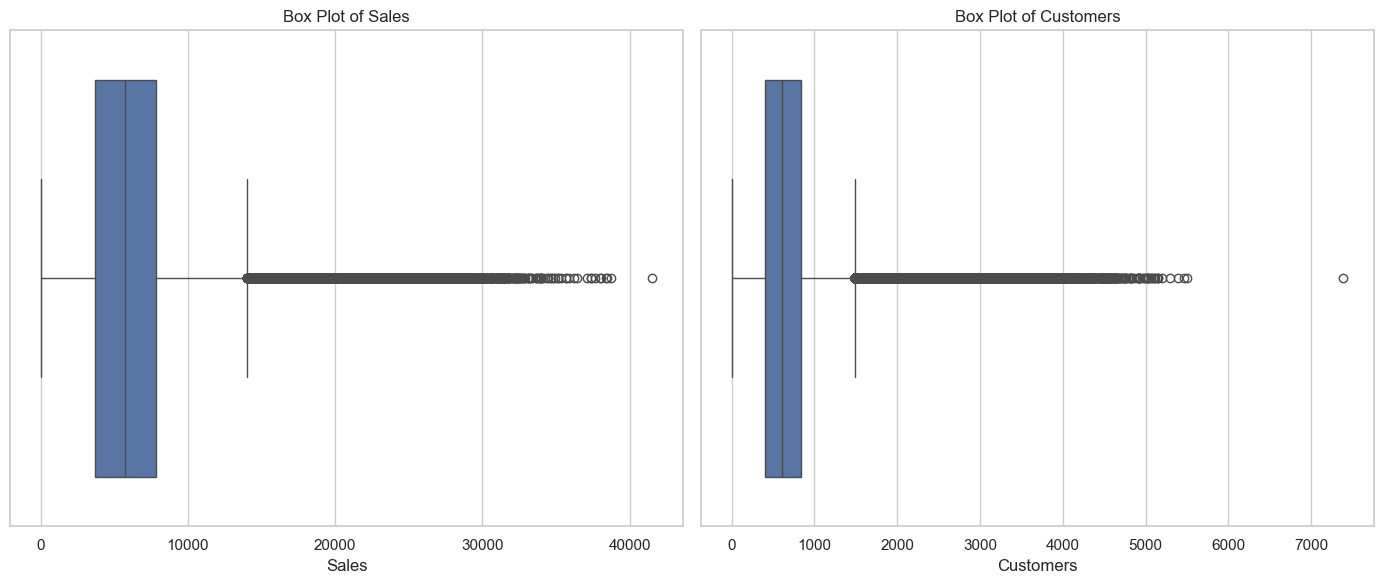

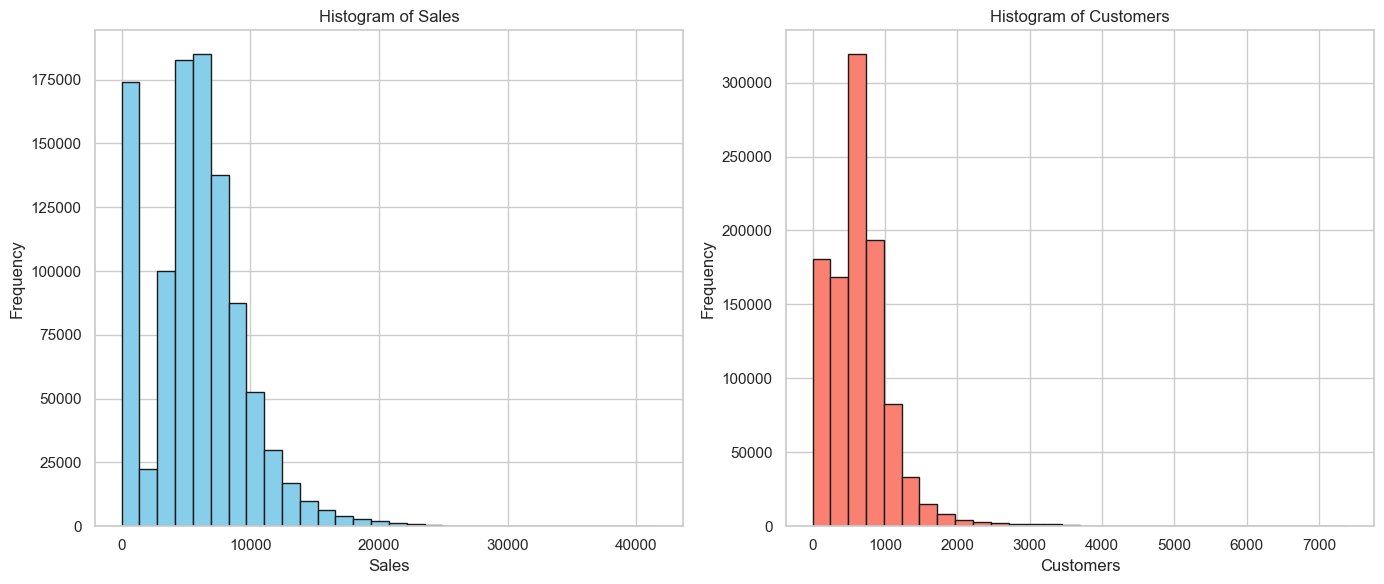

In [5]:
analyzer = CustomerBehaviorAnalyzer(processor.train_df)
analyzer.visualize_data()

The Train Data (train.csv) file provides daily sales records for various stores, with columns such as Store, DayOfWeek, Date, Sales, and Customers, ranging from 0 to 41,551. The Test Data (test.csv) is identical but eliminates Sales and Customers, with an Id column for submission. The Store Data (store.csv) contains information such as StoreType, Assortment, and CompetitionDistance, which ranges between 20 and 75,860. The Sample Submission (sample_submission.csv) is a template for submitting predictions.

Because both columns represent real-world amounts,we should not automatically dismiss all outliers as inaccurate data. High sales or client counts may simply indicate peak days (e.g., holidays, sales promotions).
lets Consider viewing the outliers first to evaluate whether they should be deleted or whether they represent true spikes in the dataset.

#### Check distributions between the training and test sets

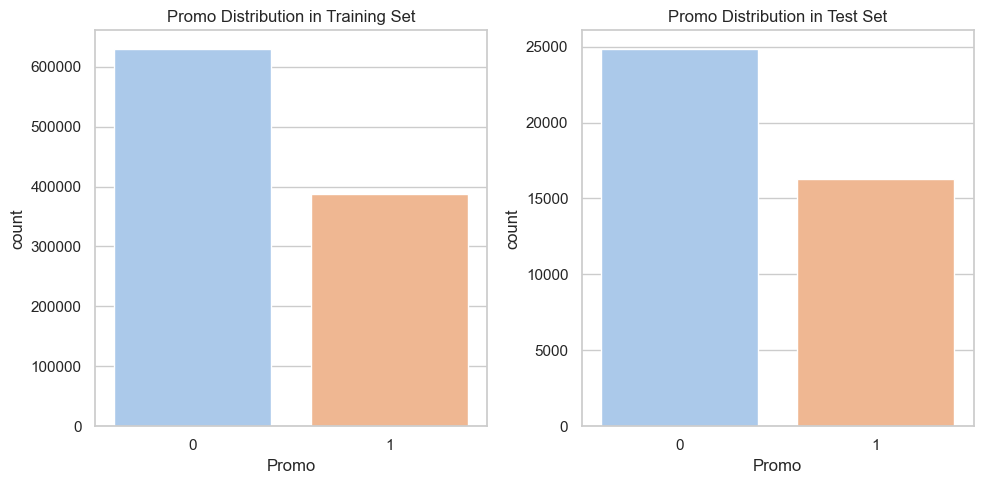

In [8]:
analyzer = SalesAnalyzer(processor.train_df, processor.test_df, processor.store_df)
analyzer.plot_promo_distribution()



#### Analyzes average sales during holidays 

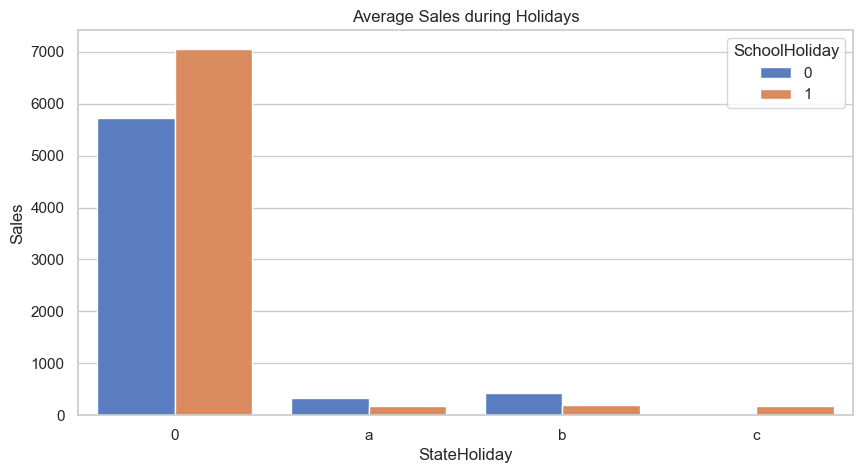

In [9]:
analyzer.analyze_sales_holidays()

#### Calculates and plots average sales by month to identify seasonal trends.

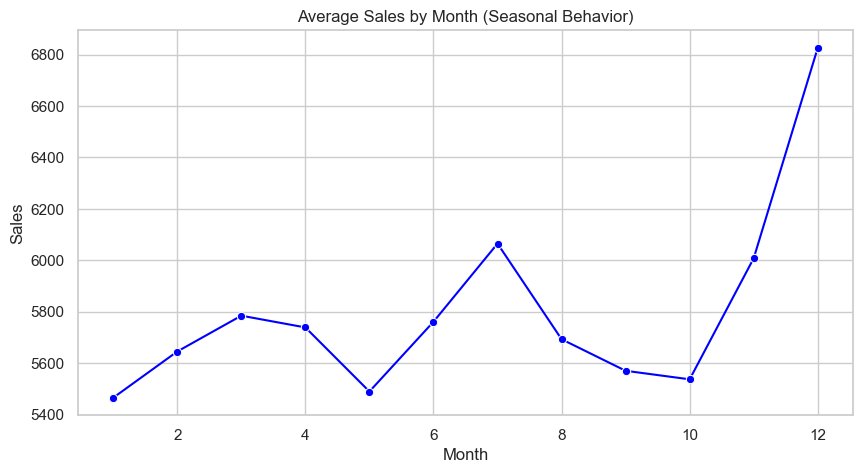

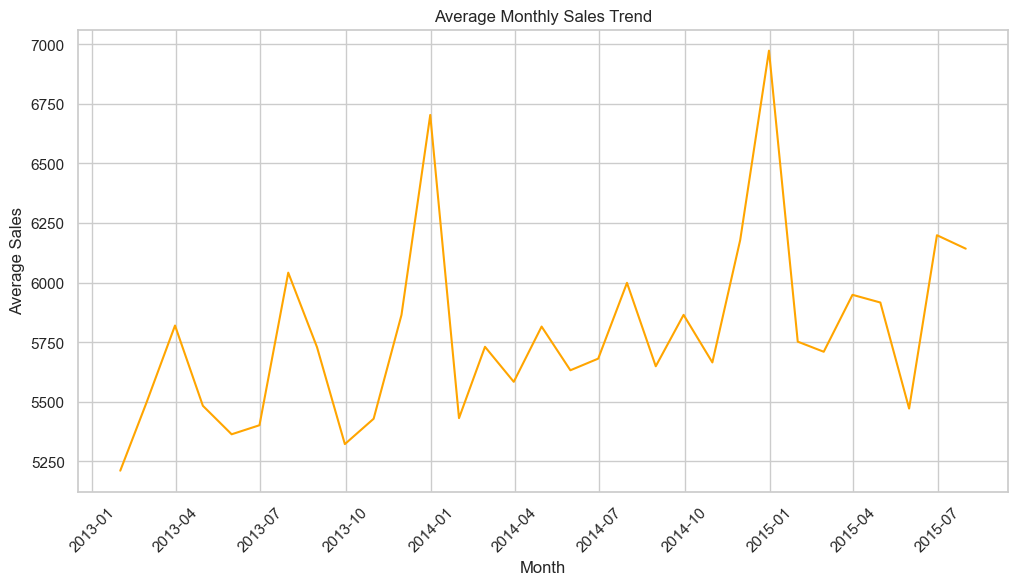

In [21]:
analyzer.analyze_sales_by_month()
analyzer.monthly_sales_trend()

#### Calculates the correlation between sales and the number of customers

Correlation between Sales and Number of Customers:
              Sales  Customers
Sales      1.000000   0.894711
Customers  0.894711   1.000000


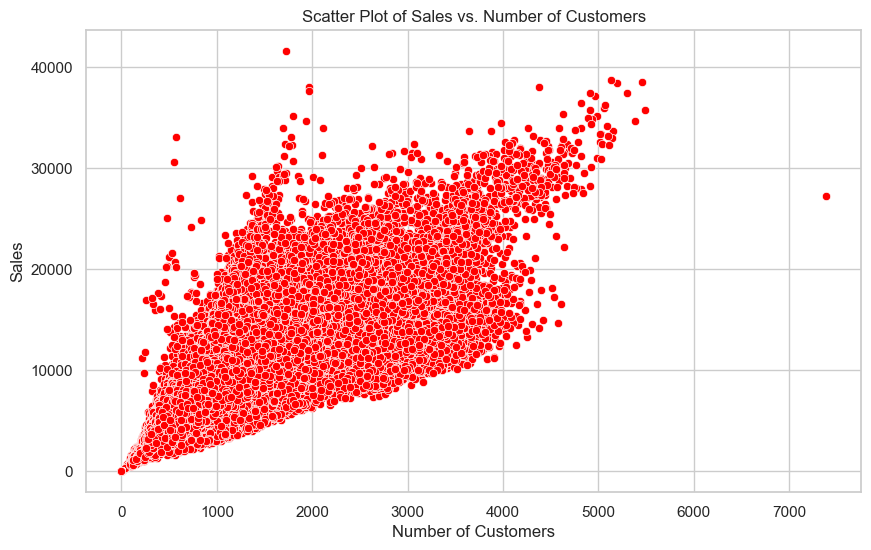

In [20]:
analyzer.correlation_analysis()
analyzer.plot_sales_vs_customers()

The correlation coefficient of 0.999 between Sales and Customers is very close to 1, which indicates a very strong positive correlation. This means that there is a positive trend between sales and the number of customers. In other words, as the number of customers increases, sales also tend to increase.

#### Ordinary Least Squares (OLS):  linear relationship between sales and the number of customers.

In [12]:
analyzer.ols_regression()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                 4.082e+06
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        06:15:57   Log-Likelihood:            -9.0214e+06
No. Observations:             1017209   AIC:                         1.804e+07
Df Residuals:                 1017207   BIC:                         1.804e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1077.7365      2.883    373.869      0.0

Coefficients:
Intercept (const): 1077.7365. This represents the estimated sales when there are no customers. While this figure isn't practical, it helps anchor the regression line.

Customer Count: 7.4171. For each additional customer, sales are expected to increase by approximately 7.42 units, indicating a strong positive relationship between customer count and sales.

P-values:
Both the intercept and the customer coefficient have p-values of 0.000, indicating they are statistically significant. This means we can confidently assert that the number of customers is a valuable predictor of sales.

F-statistic (4.082e+06):
This high F-statistic suggests that at least one predictor variable (in this case, customers) is strongly associated with the dependent variable (sales).

Durbin-Watson (1.527):
This statistic tests for autocorrelation in the residuals. Values close to 2 indicate no autocorrelation; here, it suggests some positive autocorrelation, but not to a concerning degree.

Condition Number (1.33e+03):
A high condition number may indicate multicollinearity or numerical instability. However, this isn't a major concern here since the model includes only one predictor.

#### Compares average sales with and without promotions.

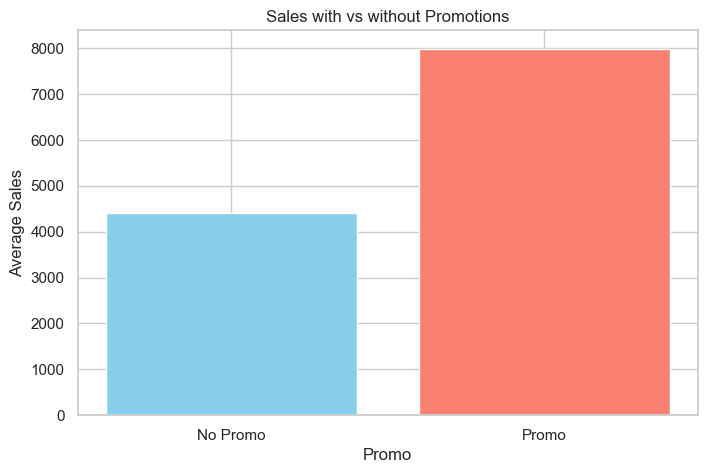

In [13]:
analyzer.compare_promo_sales()

#### Creates customer categories (Small, Medium, Large) 

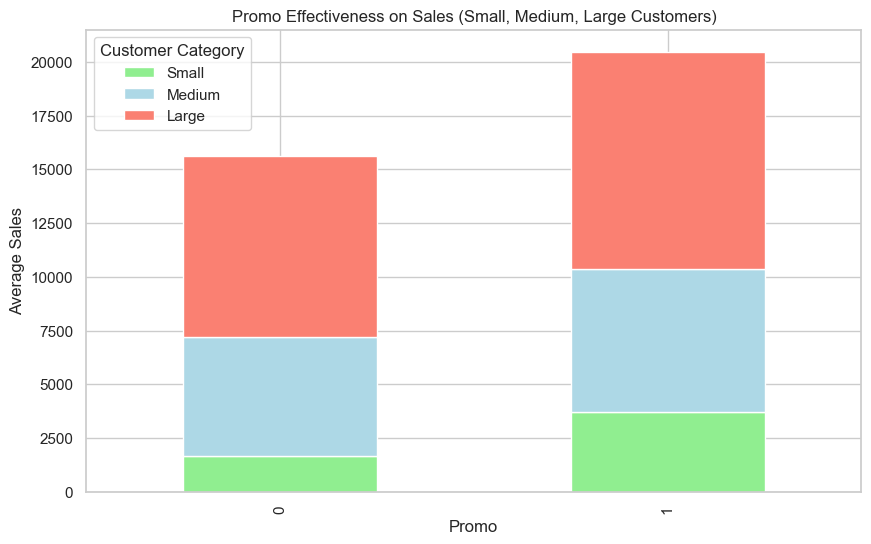

In [14]:
analyzer.analyze_customer_categories()

Small customers: These customers saw the largest rise in average sales, indicating that promotions are very successful in boosting sales for this demographic.
Medium-sized customers: The average sales growth for this customer segment is moderate, suggesting that promotions have a discernible but less dramatic impact on this group.
Big clients: The biggest average sales growth is shown in this category, indicating that promotions may not have much of an impact—if any—on this customer base's sales.

#### Calculates and plots average sales by assortment type

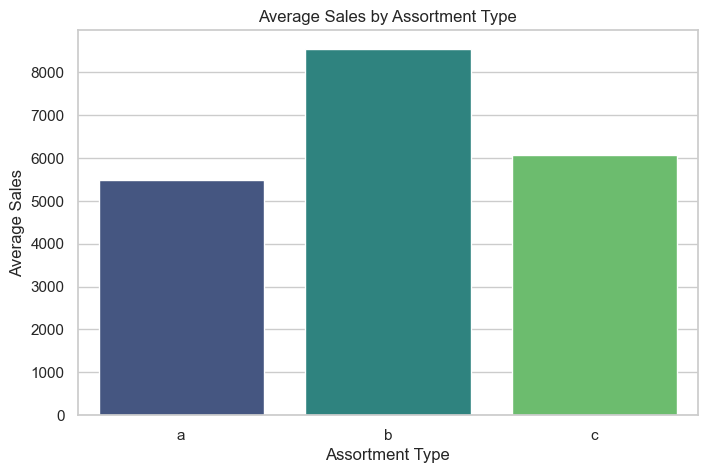

In [15]:
analyzer.analyze_assortment_sales()

#### Analyzes the relationship between average sales and the distance to the nearest competitor.

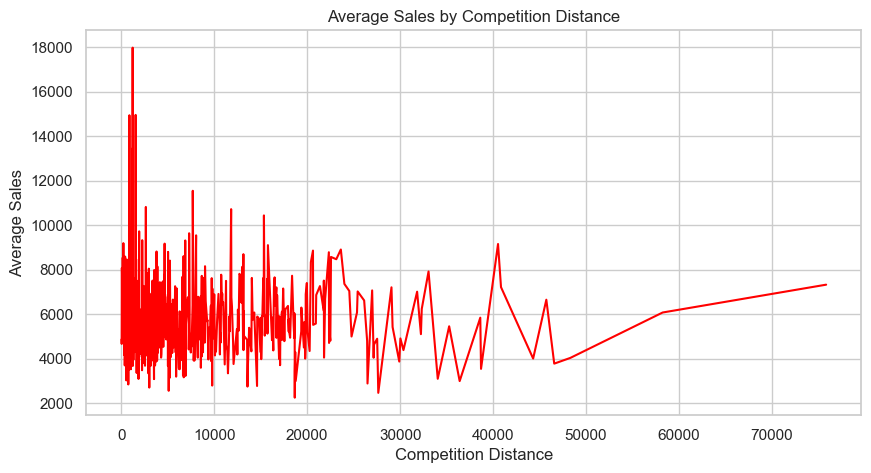

In [16]:
analyzer.analyze_sales_by_competition_distance()

#### Analyzes average sales and competition distance for stores located in city centers 

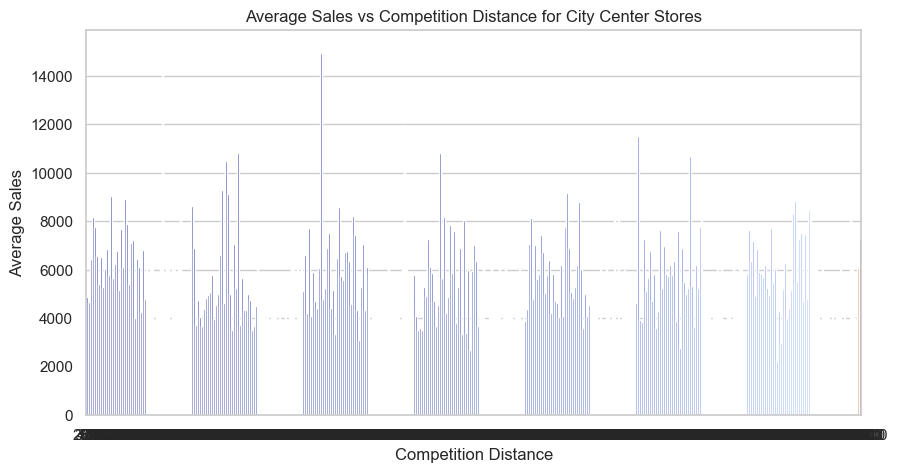

In [17]:
analyzer.analyze_city_center_stores()

The data points are widely scattered,indicating a high degree of variability in the relationship. This means that competition distance alone cannot fully explain the variation in average sales.

#### Reference 
1. https://clubztutoring.com/ed-resources/math/correlation-definitions-examples-6-7-6-2/
